In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [2]:
paths = sorted(glob.glob('*.info.csv'))

all_df = pd.concat([pd.read_csv(p) for p in paths], axis=0, 
                   ignore_index=True)

all_df['safe'] = (all_df['off_target_hits'] == 0)
all_df['broad'] = (all_df['on_target_freq'] >= 0.75)
all_df['effective'] = (all_df['mean_rc'] <= 0.1)

all_df['safe_broad'] = all_df['safe'] & all_df['broad']
all_df['safe_effective'] = all_df['safe'] & all_df['effective']
all_df['safe_broad_effective'] = all_df['safe'] & all_df['effective'] & all_df['broad']

all_df.head()

,protospacer,chrom,start,hit,strand,mismatches,num_lethal,mean_rc,cas,pam_motif,on_target_freq,off_target_hits,mismatch,safe,broad,effective,safe_broad,safe_effective,safe_broad_effective
0,CCCCCAATCCCCCCTTTTCT,HXB2,4783,GTACCCCCCAATCCCCCCTTTTCTTTTA,-,0,22,0.094591,LbCas12a_Cpf1,TTTN,0.0,NaN,0,False,False,True,False,False,False
1,CCCCCAATCCCCCCTTTTCT,HXB2,9067,AGCCCttCCAgTCCCCCCTTTTCTTTTA,-,3,2,0.483408,LbCas12a_Cpf1,TTTN,0.0,NaN,0,False,False,False,False,False,False
2,CAATCATCACCTGCCATCTG,HXB2,5044,CACACAATCATCACCTGCCATCTGTTTT,-,0,19,0.121663,LbCas12a_Cpf1,TTTN,0.0,NaN,0,False,False,False,False,False,False
3,AATCATCACCTGCCATCTGT,HXB2,5043,ACACAATCATCACCTGCCATCTGTTTTC,-,0,19,0.124465,LbCas12a_Cpf1,TTTN,0.0,NaN,0,False,False,False,False,False,False
4,ATAAACCCGAAAATTTTGAA,HXB2,4883,TGTAATAAACCCGAAAATTTTGAATTTT,-,0,11,0.069978,LbCas12a_Cpf1,TTTN,0.0,NaN,0,False,False,True,False,False,False


In [3]:
totals = all_df.groupby(['cas', 'mismatch'], as_index=False)[['safe', 'broad', 'effective', 'safe_broad', 'safe_effective', 'safe_broad_effective']].sum()
totals

,cas,mismatch,safe,broad,effective,safe_broad,safe_effective,safe_broad_effective
0,LbCas12a_Cpf1,0,2,0,8394,0,1,0
1,LbCas12a_Cpf1,1,52,6,8394,4,21,1
2,LbCas12a_Cpf1,2,146,110,8394,41,77,21
3,LbCas12a_Cpf1,3,12,334,8394,4,9,4
4,LbCas12a_Cpf1,4,0,601,8394,0,0,0
5,SaCas9-WT,0,1,1,7146,1,0,0
6,SaCas9-WT,1,7,1,7146,1,3,0
7,SaCas9-WT,2,41,16,7146,8,13,4
8,SaCas9-WT,3,11,87,7146,5,3,1
9,SaCas9-WT,4,0,139,7146,0,0,0


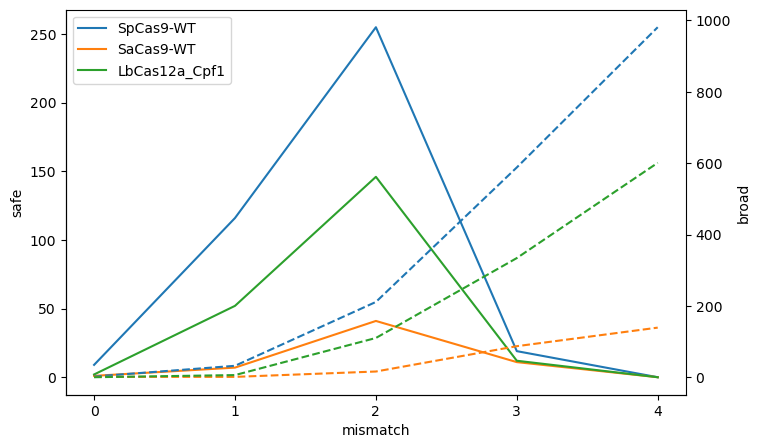

In [15]:

fig, safe_ax = plt.subplots(1,1, figsize=(8, 5))

broad_ax = safe_ax.twinx()

sns.lineplot(data = totals,
             x = 'mismatch',
             y = 'safe', 
             hue='cas', 
             hue_order = ['SpCas9-WT', 'SaCas9-WT', 'LbCas12a_Cpf1'],
             ax=safe_ax)
safe_ax.legend(loc= 'upper left')
sns.despine(ax=safe_ax)

sns.lineplot(data = totals,
             x = 'mismatch',
             y = 'broad', 
             hue='cas', ax=broad_ax,
             hue_order = ['SpCas9-WT', 'SaCas9-WT', 'LbCas12a_Cpf1'],
             linestyle = '--', legend=False)

safe_ax.set_xticks([0, 1, 2, 3, 4])
fig.savefig('mismatch_effect.png', dpi=300)

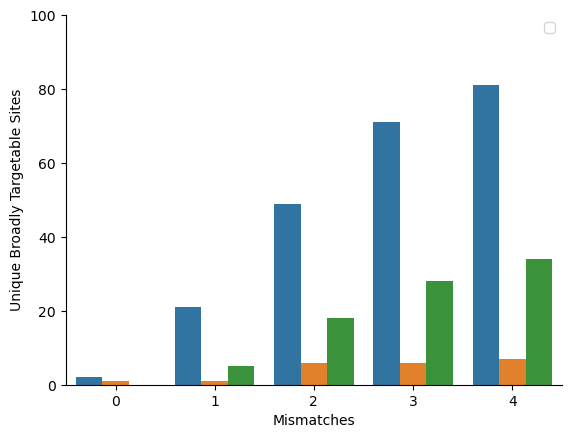

In [42]:
uni_sites = all_df.query('on_target_freq>0.75').groupby(['cas', 'mismatch'], as_index=False)['start'].nunique()
ax = sns.barplot(data = uni_sites,
                 hue = 'cas', y = 'start',
                 x = 'mismatch',
                 hue_order = ['SpCas9-WT', 'SaCas9-WT', 'LbCas12a_Cpf1'])
ax.legend([])
ax.set_ylim(0, 100)
ax.set_ylabel('Unique Broadly Targetable Sites')
ax.set_xlabel('Mismatches')
sns.despine(ax=ax)

In [43]:
piv_df = pd.pivot_table(all_df,
                        index = ['cas', 'protospacer', 'mismatch'],
                        #columns = ,
                        values = ['on_target_freq', 'off_target_hits'])
piv_df.query('on_target_freq > 0.75')

off_target_hits  on_target_freq
cas           protospacer          mismatch                                 
LbCas12a_Cpf1 AAAAATTGTTTTTGTAATTC 4                   166.0        0.881684
              AAAATTAGTTTTTGTAATTC 4                   129.0        0.881684
              AAAATTTGTTTTTGTAATTC 3                    41.0        0.881684
                                   4                   170.0        0.932487
              ACAGGCCATCTTCCTGCTAA 2                     0.0        0.854278
...                                                      ...             ...
SpCas9-WT     TTTCTTCCAATTATGTTGAC 1                     0.0        0.860963
                                   2                     0.0        0.962567
                                   3                    15.0        0.982620
                                   4                    39.0        0.992647
              TTTTAGGCATCTCCCATGGC 4                    31.0        0.885695

[3046 rows x 2 columns]

<Axes: xlabel='mismatch', ylabel='on_target_freq'>

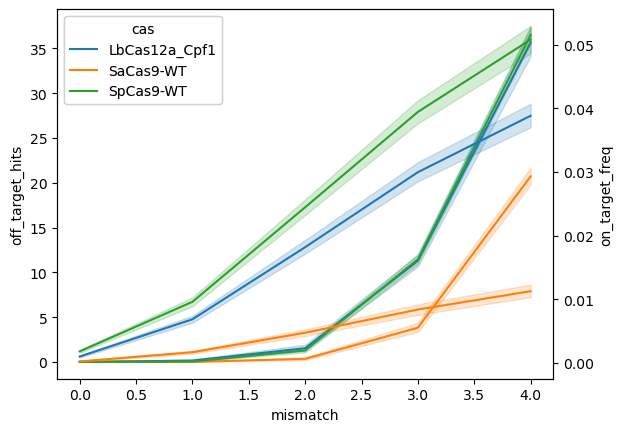

In [46]:
ax = sns.lineplot(data = piv_df.reset_index(),
                  x = 'mismatch', y = 'off_target_hits', hue = 'cas')
tax = ax.twinx()
sns.lineplot(data = piv_df.reset_index(),
             x = 'mismatch', y = 'on_target_freq', hue = 'cas', ax=tax)


In [27]:
piv_df.dropna()

off_target_hits  on_target_freq
cas           protospacer          mismatch                                 
LbCas12a_Cpf1 AAAAATTGTTTTTGTAATTC 3                    41.0        0.631684
                                   4                   166.0        0.881684
              AAAATTAGTTTTTGTAATTC 3                    33.0        0.631016
                                   4                   129.0        0.881684
              AAAATTTGTTTTTGTAATTC 2                    14.0        0.630348
...                                                      ...             ...
SpCas9-WT     TTTCTTCCAATTATGTTGAC 1                     0.0        0.860963
                                   2                     0.0        0.962567
                                   3                    15.0        0.982620
                                   4                    39.0        0.992647
              TTTTAGGCATCTCCCATGGC 4                    31.0        0.885695

[5375 rows x 2 columns]